In [6]:
from __future__ import division
import sys
from pprint import pprint
from math import log
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np #numpy provides useful maths and vector operations
from numpy.random import random_sample
import nltk
from nltk import FreqDist, ConditionalFreqDist
from nltk.tag import *
from nltk.corpus import dependency_treebank
from nltk.tag.hmm import HiddenMarkovModelTagger


In [90]:
def plot_histogram(lcPairs):
    '''plot_histogram is a very general function that takes either a dictionary
    or a list of label,count pairs (values or counts need to be
    numbers), and makes a bar plot showing the count for each label.
    '''
    f, ax = plt.subplots(figsize=(15,15))
    plt.clf()
    if isinstance(lcPairs, dict):
        lcPairs = list(lcPairs.items())
    #arange() is like range() but returns a numpy array instead of a list
    x_pos = np.arange(len(lcPairs)) 
    #first arg (x_pos) is the position of left hand side of bar
    #second arg (counts) is the height of bar
    (labels,counts)=zip(*lcPairs)
    plt.bar(x_pos,counts,width=1)
    #bar width is 1, so put labels at left side + .5 (middle of bar), rotated slightly
    plt.xticks(x_pos+.5, labels, rotation=50)
    plt.ylim([0,1.1*max(counts)])
    plt.show()

In [91]:
def sent_length_distribution(sents):
    ''' tag_distribution takes tagged sentences extracted using nltk libraries
    as input and returns a frequency distribution of sentence lengths
    '''
    fd=defaultdict(int)
    for s in sents:
        n=len(s)
        fd[n]+=1
    return fd


In [92]:
def tag_distribution(sents):
    ''' tag_distribution takes tagged sentences extracted using nltk libraries
    as input and returns a frequency distribution of pos tags
    '''
    fd=defaultdict(int)
    for s in sents:
        for (w,t) in s:
            fd[t] +=1
    return fd

In [93]:
def word_tag_distribution(sents):
    ''' word_tag_distribution takes tagged sentences extracted using nltk libraries
    as input and returns the conditional frequency distribution of word and pos tags
    '''
    # Instead of using defaultdict, do things a step at a time:
    cfd = {}
    # For each word,tag tuple in each sentence,
    #   create an fd if necessary, and update the tag count
    for sent in sents:
        for (w,t) in sent:
            fd=cfd.setdefault(w,{}) # either get the value,
            #print(fd)                        #  or give it an empty dictionary as value
            if t in fd:
                # a known key
                fd[t] +=1
            else:
                # not previously seen
                fd[t] = 1
    return cfd


In [94]:
def unigram_tagger(cfd, bpos, sent):
    ''' This is a simple pos tagger. It takes conditional frequency 
    distribution (cfd) of word and its tags, and sentence as input 
    and assigns pos tags to the words in that sentence. If a word is
    seen (present in cfd), it assigns the most frequent tag for that
    word. For unseen words (not present in cfd), it assigns a default
    pos tag (in this case common noun "NN").
    '''
    words = sent.rstrip().split()	
    ## students need to fill in correct function defn for ut1
    ##
    ## note that the list comprehension below constructs a list
    ## that contains one item for each w in words, where that
    ## item is ut1(w,cfd,bpos).
    return [ut1(w,cfd,bpos) for w in words]

In [95]:
def ut1(word,cfd,bpos):
    ''' Helper function for unigram_tagger.  Look up the most common tag for
        a single word in cfd, using bpos if it's not in there.
        Returns a pair (word, tag)'''
    if word in cfd:
        return  max(cfd[word], key=cfd[word].get)  
    else:
        return bpos  
    

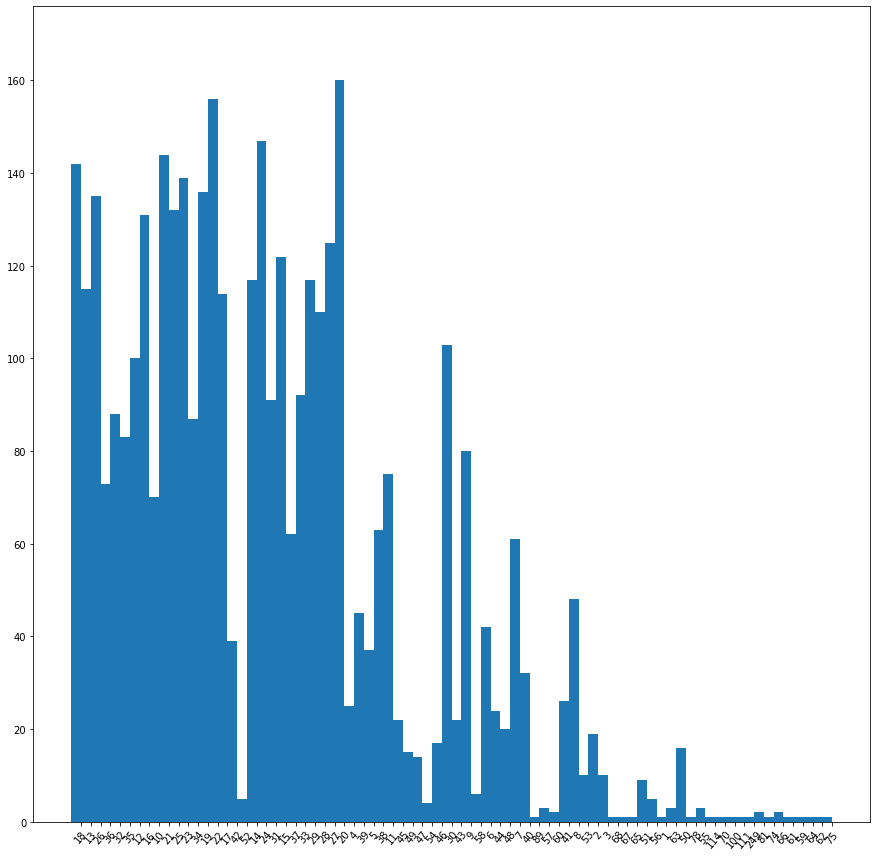

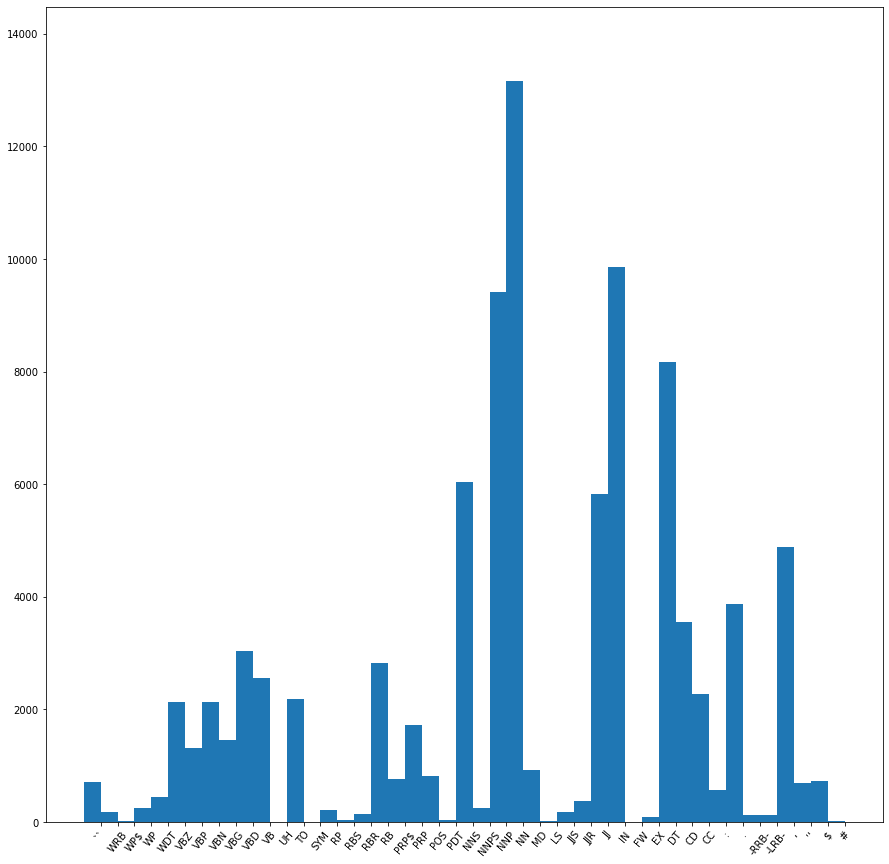

tags for book are: {'NN': 7, 'VB': 1}
sentence is : The quick brown fox jumped over the lazy dog
tags are: ['DT', 'JJ', 'NN', 'NN', 'VBD', 'IN', 'DT', 'NN', 'NN']


In [96]:
# Extracting tagged sentences using NLTK libraries
tsents = dependency_treebank.tagged_sents()
if (len(sys.argv)<2 or sys.argv[1]!='-q'):
    try:
        loaded+=1
    except NameError:
        loaded=1
        print("\nFirst tagged sentence:\n{}".format(tsents[0]))
        print("\nFirst tuple in the sentence: {}".format(tsents[0][0]))
        print("\nWord in the first tuple: {}".format(tsents[0][0][0]))
        print("\nTag in the first tuple: {}".format(tsents[0][0][1]))
        print("\nTotal Number of sentences: {}".format(len(tsents)))
        print("\nAverage Sentence Length: {}".format((sum([len(sent) for sent in tsents]))/len(tsents)))
        
# Sentence length distribution
sent_lengths=sent_length_distribution(tsents)
plot_histogram(sent_lengths) # or plot_histogram(sorted(sent_lengths.items(),key=lambda p:p[0]))

# Tag Distribution: uncomment when you've filled in tag_distribution
tag_dist = tag_distribution(tsents)
plot_histogram(sorted(tag_dist.items(),key=lambda p:p[0],reverse=True))

# Word Tag Distribution: uncomment when you've filled in word_tag_distribution
word_tag_dist = word_tag_distribution(tsents)
print("tags for book are: {}".format(word_tag_dist["book"]))

##UNigram tagger
cfd=word_tag_dist
bpos="NN"
sent='The quick brown fox jumped over the lazy dog'
tag_list=unigram_tagger(cfd, bpos, sent)
print("sentence is : {}".format(sent))
print("tags are: {}".format(tag_list))
